<a href="https://www.kaggle.com/code/risakashiwabara/eda-time-series-bar-lineplot?scriptVersionId=160633024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p><center style="color:Green; font-family:Cormorant Garamond; font-size:30px;">Thanks for visiting my notebook📖👀 </center></p>

![](https://i.postimg.cc/fWHxYRsf/Firefly-55233.jpg)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CL6cTnJM/publicdomainq-0032797.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">  Import Library</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CL6cTnJM/publicdomainq-0032797.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">  Sample data acquisition</p>

In [2]:
df_month = pd.read_csv('/kaggle/input/japannumber-of-visitors-to-japan/Number of foreign visitors to Japan by month_ .csv')
df_month

,Country/Area,Month,Year,Visitor
0,Afghanistan,Jan.,2017,233
1,Afghanistan,Feb.,2017,196
2,Afghanistan,Mar.,2017,192
3,Afghanistan,Apr.,2017,259
4,Afghanistan,May,2017,228
...,...,...,...,...
17047,Zimbabwe,Aug.,2023,0
17048,Zimbabwe,Sep.,2023,0
17049,Zimbabwe,Oct.,2023,0
17050,Zimbabwe,Nov.,2023,0


In [3]:
df_year = pd.read_csv('/kaggle/input/japannumber-of-visitors-to-japan/Number of foreign visitors to Japan by year_ .csv')
df_year

,Year,Visitor Arrivals
0,1964,352832
1,1965,366649
2,1966,432937
3,1967,476771
4,1968,519004
5,1969,608744
6,1970,854419
7,1971,660715
8,1972,723744
9,1973,784691


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CL6cTnJM/publicdomainq-0032797.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> geopandas</p>

## ①  import 

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

## ②  geopandas

In [5]:
#Porygondata in geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world[:5]

/tmp/ipykernel_20/481643257.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## ③ countries list

In [6]:
#Give a list of countries you want to look up.
countries_to_plot = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central Africa', 'Chad', 'Chile', 'China',
       'Columbia', 'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Germany', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia',
       'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macau',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia',
       'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
       'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan',
       'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Republic of Congo', 'Republic of Kosovo',
       'Republic of South Africa', 'Republic of South Sudan', 'Romania',
       'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent', 'Samoa', 'San Marino', 'Sao Tome and Principe',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Serbia and Montenegro',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Solomon', 'Somalia', 'South Korea', 'South Yemen', 'Spain',
       'Sri Lanka', 'Stateless and others', 'Sudan', 'Suriname', 'Sweden',
       'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania',
       'Thailand', 'The Bahamas', 'Togo', 'Tonga', 'Trinidad and Tobago',
       'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Unknown', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']


## ④ correspond to countries_to_plot　

In [7]:
# world['name']→All Countries　, countries_to_plot→Selected Countries
world_to_plot = world[world['name'].isin(countries_to_plot)]

## ⑤ plot　

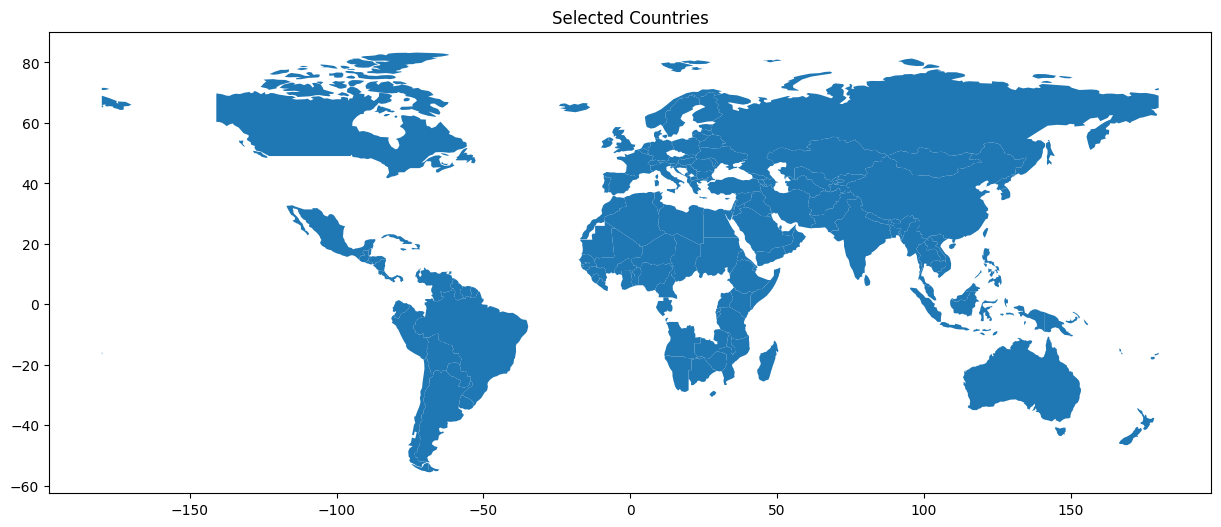

In [8]:
world_to_plot.plot(figsize=(15, 10))
plt.title('Selected Countries')
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CL6cTnJM/publicdomainq-0032797.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> geopandas-Data for this time</p>

## ① grouped sum

In [9]:
df_drop = df_month.drop(['Month ','Year'], axis=1)
grouped = df_drop.groupby('Country/Area')
group_sums = grouped.sum()
group_sum = group_sums.reset_index()
df = group_sum
df

,Country/Area,Visitor
0,Afghanistan,16752
1,Albania,1675
2,Algeria,3945
3,Andorra,780
4,Angola,1226
...,...,...
198,Venezuela,6982
199,Vietnam,1957110
200,Yemen,1610
201,Zambia,2611


## ② Visitor merge in  geopandas

In [10]:
world_to_plot_df = pd.merge(world_to_plot, df, left_on='name', right_on='Country/Area', how='outer')
world_to_plot_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country/Area,Visitor
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,5999
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3554
2,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,1307497
3,18513930.0,Asia,Kazakhstan,KAZ,181665.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,20812
4,33580650.0,Asia,Uzbekistan,UZB,57921.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,26409
...,...,...,...,...,...,...,...,...
198,NaN,NaN,NaN,NaN,NaN,None,Tonga,1570
199,NaN,NaN,NaN,NaN,NaN,None,Tuvalu,236
200,NaN,NaN,NaN,NaN,NaN,None,United States,6160286
201,NaN,NaN,NaN,NaN,NaN,None,Unknown,0


## ③ plot　

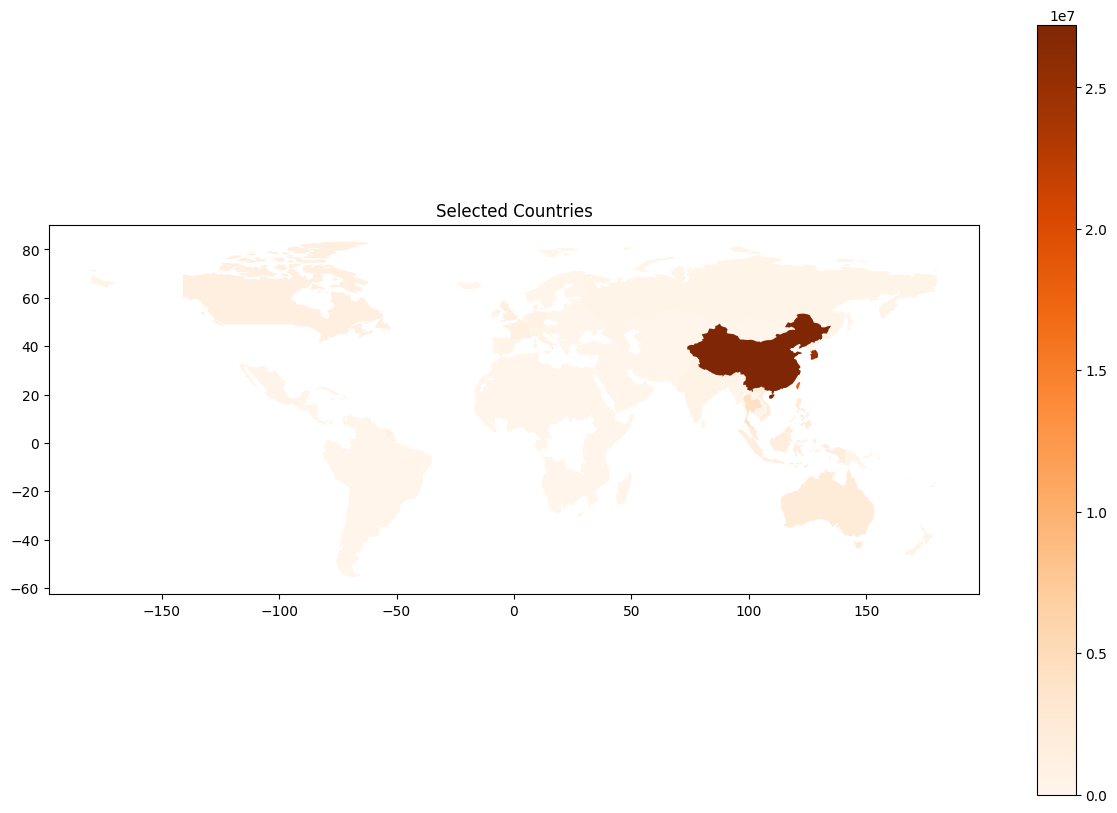

In [11]:
world_to_plot_df.plot(column="Visitor", legend=True, cmap="Oranges",figsize=(15, 10))
plt.title('Selected Countries')
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CL6cTnJM/publicdomainq-0032797.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> extra </p>

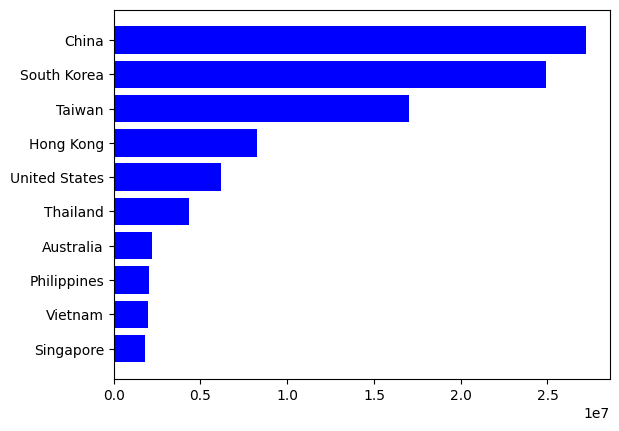

In [12]:
#Top 10 most visited countries
df_drop = df_month.drop(['Month ','Year'], axis=1)
grouped = df_drop.groupby('Country/Area')
group_sums = grouped.sum()
group_sum = group_sums.reset_index()
df = group_sum
def remove_any_zero_row(df):
    df = df.copy()
    for row in df.index:
        if (df.loc[row] == 0).any():
            df.drop(row, axis=0, inplace=True)
    return df
month_visitor = remove_any_zero_row(df)
month_visitor = month_visitor.sort_values(['Visitor','Country/Area'])
month_ten = month_visitor[-10:]
month_ten
height = month_ten['Visitor']
left = month_ten['Country/Area']
plt.barh(left, height, color='b')
plt.show()

<Axes: xlabel='Year'>

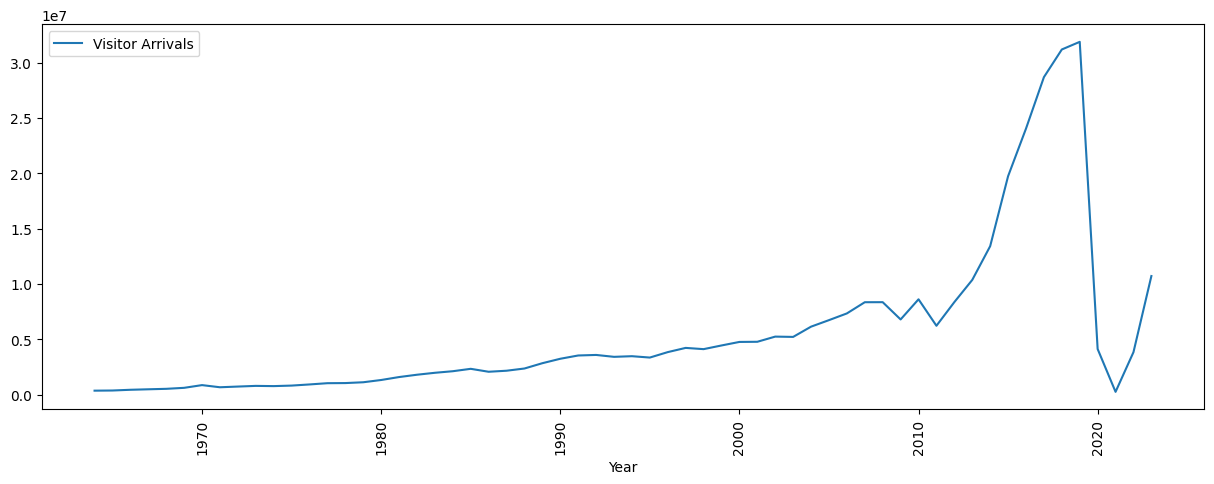

In [13]:
#Number of visits per year
df_y = df_year.set_index('Year')
df_y
plt.figure(figsize=(15,5)) 
plt.xticks(rotation=90) 
sns.lineplot(data=df_y)